#Modelo para classificação de imagens

In [ ]:
#iniciar nginx
# sudo nginx -c $(pwd)/esp-zrok.conf
#iniciar port forwarding com zrok
# zrok share public http://localhost:8080 --backend-mode proxy

#Fazer diretórios da objeto contagem de objetos


In [ ]:
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/test/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/train/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/val/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/test/vazio/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/train/vazio/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/val/vazio/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/test/led_verm_1/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/test/led_verm_2/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/test/led_verm_3/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/train/led_verm_1/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/train/led_verm_2/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/train/led_verm_3/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/val/led_verm_1/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/val/led_verm_2/
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/val/led_verm_3/

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/U3TinyML/’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/U3TinyML/dataset/’: File exists


In [ ]:
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/saved_model/

In [ ]:
!pip install requests
!pip install time
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.5 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

## Bibliotecas

In [ ]:
# Bibliotecas
import numpy as np
import cv2
import requests
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
import matplotlib.pyplot as plt
import os

# Fazer Dataset


###Função para capturar imagens do ESP-CAM



In [ ]:
# prompt: #Capturar imagens do ESP-CAM
from google.colab.patches import cv2_imshow
url = "https://7mfz4vqbxkim.share.zrok.io"
reqframesize = "/control?var=framesize&val=5"
reqcapture = "/capture"
datasetpath = "/content/drive/MyDrive/Colab Notebooks/U3TinyML/dataset/"
paths = ["test/vazio/",
         "train/vazio/",
         "val/vazio/",
         "test/led_verm_1/",
         "train/led_verm_1/",
         "val/led_verm_1/",
         "test/led_verm_2/",
         "train/led_verm_2/",
         "val/led_verm_2/",
         "test/led_verm_3/",
         "train/led_verm_3/",
         "val/led_verm_3/",]
numim_per_type = 30
delay_btw_capture = 1 #segundos
def capture_image():
  headers = {"skip_zrok_interstitial": "true"} # Define o cabeçalho aqui
  try:
    response = requests.get(url + reqframesize, headers=headers) # Passa o cabeçalho na requisição
    response = requests.get(url + reqcapture, headers=headers) # Passa o cabeçalho na requisição
    print(response.status_code)
    img_array = np.array(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img
  except Exception as e:
    print(f"Erro ao capturar imagem: {e}")
    return None

img = capture_image()

# Teste
# if img is not None:
#   plt.imshow(img)
#   cv2.imwrite("test.jpg", img)



404


In [ ]:
for i in range(0, 12):
  print(f"Iniciando captura de {paths[i]} em 10 segundos")
  for cont in range(0, 10):
    print(cont)
    time.sleep(1)
  print(f"Você tem {delay_btw_capture} segundos para posicionar o objeto")
  for n in range (numim_per_type, int(2.5*numim_per_type)):
    for cont in range(0, delay_btw_capture):
      print(cont)
      time.sleep(1)
    img = capture_image()
    cv2.imwrite(f"{datasetpath + paths[i]}img{n}.jpg", img)

#Carregando dataset

In [ ]:
# Tamanho das imagens
img_height = 240
img_width = 240
batch_size = 30

# Diretórios


train_dir = f"{datasetpath}/train"
val_dir = f"{datasetpath}/val"
test_dir = f"{datasetpath}/test"

# Carrega os dados diretamente dos diretórios
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size, # usado para definir o agrupamento de imagens para o treinamento
    label_mode="int",  # para que cada tipo de imagem seja categorizada em um numero inteiro
    shuffle=True,
    seed=123   # usado para repetibilidade
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size, # usado para definir o agrupamento de imagens para o treinamento
    label_mode="int",  # para que cada tipo de imagem seja categorizada em um numero inteiro
    shuffle=True,
    seed=123   # usado para repetibilidade
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size, # usado para definir o agrupamento de imagens para o treinamento
    label_mode="int",  # para que cada tipo de imagem seja categorizada em um numero inteiro
    shuffle=True,
    seed=123   # usado para repetibilidade
)
print(train_ds.class_names)

Found 300 files belonging to 4 classes.
Found 300 files belonging to 4 classes.
Found 300 files belonging to 4 classes.
['led_verm_1', 'led_verm_2', 'led_verm_3', 'vazio']


In [ ]:
import os

val_counts = {}
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        val_counts[class_name] = count

for k, v in sorted(val_counts.items()):
    print(f"{k}: {v} imagens")


led_verm_1: 75 imagens
led_verm_2: 75 imagens
led_verm_3: 75 imagens
vazio: 75 imagens


#Criando modelo


In [ ]:
# Modelo CNN
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

model = Sequential()
model.add(layers.Input(shape=(img_height, img_width, 3)))
# model.add(data_augmentation)
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(16, (3,3), strides=(2,2), padding='same',activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same',activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(4, activation='softmax'))

#Treinamento do modelo

In [ ]:
from keras.callbacks import ReduceLROnPlateau
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# plot_callback = tf.callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [ ]:
!mkdir /content/drive/MyDrive/Colab\ Notebooks/U3TinyML/dataset/saved_model/

In [ ]:
# Iniciar treinamento com número alto de épocas para garantir o aprendizado
epochs = 50 #Aumentar epocas
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

#Cross Validation | Não usada

Found 120 files belonging to 4 classes.

--- Fold 1 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Acurácia no Fold 1: 0.9583

--- Fold 2 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Acurácia no Fold 2: 1.0000

--- Fold 3 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Acurácia no Fold 3: 0.9583

--- Fold 4 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Acurácia no Fold 4: 0.9583

--- Fold 5 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Acurácia no Fold 5: 0.9583

Média de acurácia nos 5 folds: 0.9667

--- Fold 6 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Acurácia no Fold 6: 1.0000


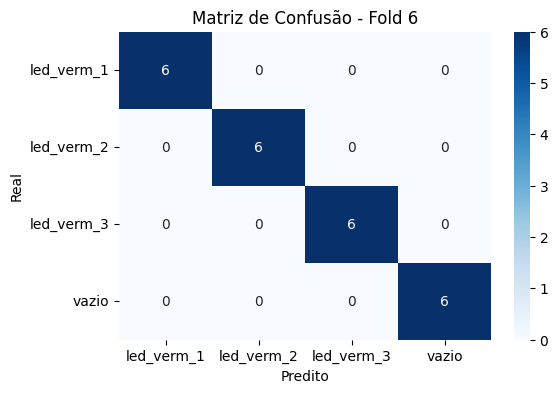

              precision    recall  f1-score   support

  led_verm_1       1.00      1.00      1.00         6
  led_verm_2       1.00      1.00      1.00         6
  led_verm_3       1.00      1.00      1.00         6
       vazio       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


--- Fold 7 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Acurácia no Fold 7: 1.0000


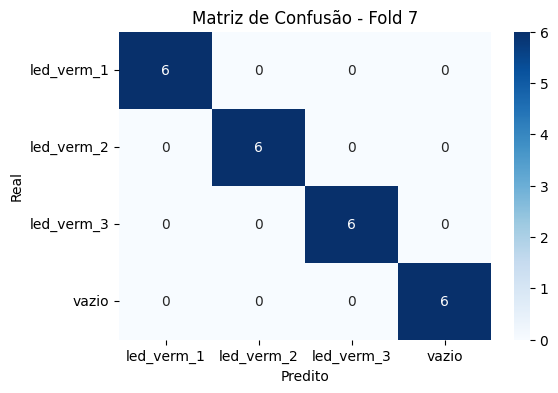

              precision    recall  f1-score   support

  led_verm_1       1.00      1.00      1.00         6
  led_verm_2       1.00      1.00      1.00         6
  led_verm_3       1.00      1.00      1.00         6
       vazio       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


--- Fold 8 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Acurácia no Fold 8: 1.0000


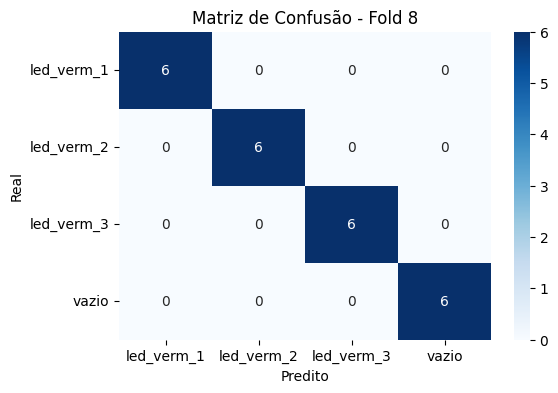

              precision    recall  f1-score   support

  led_verm_1       1.00      1.00      1.00         6
  led_verm_2       1.00      1.00      1.00         6
  led_verm_3       1.00      1.00      1.00         6
       vazio       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


--- Fold 9 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Acurácia no Fold 9: 1.0000


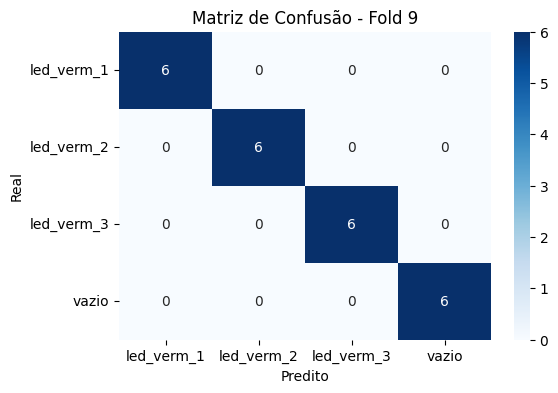

              precision    recall  f1-score   support

  led_verm_1       1.00      1.00      1.00         6
  led_verm_2       1.00      1.00      1.00         6
  led_verm_3       1.00      1.00      1.00         6
       vazio       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


--- Fold 10 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Acurácia no Fold 10: 1.0000


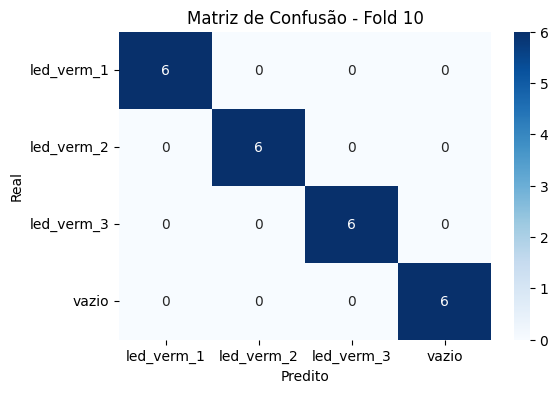

              precision    recall  f1-score   support

  led_verm_1       1.00      1.00      1.00         6
  led_verm_2       1.00      1.00      1.00         6
  led_verm_3       1.00      1.00      1.00         6
       vazio       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import os

# Parâmetros
img_height, img_width = 240, 240
batch_size = 30
num_folds = 5

# Carrega todo o dataset
dataset_all = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    image_size=(img_height, img_width),
    label_mode='int',
    shuffle=False
)

class_names = dataset_all.class_names

# Converte para arrays
X = []
y = []

for images, labels in dataset_all:
    X.append(images.numpy())
    y.append(labels.numpy())

X = np.concatenate(X)
y = np.concatenate(y)

# Normaliza
X = X / 255.0

# K-Fold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, val_index in skf.split(X, y):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Modelo CNN (pode adaptar como quiser)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=2, padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              epochs=20,
              batch_size=32,
              verbose=0)

    preds = np.argmax(model.predict(X_val), axis=1)
    acc = accuracy_score(y_val, preds)
    print(f"Acurácia no Fold {fold}: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print(f"\nMédia de acurácia nos {num_folds} folds: {np.mean(accuracies):.4f}")

for train_index, val_index in skf.split(X, y):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train,
              epochs=20,
              batch_size=32,
              verbose=0)

    # Previsões
    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Acurácia
    acc = accuracy_score(y_val, y_pred)
    print(f"Acurácia no Fold {fold}: {acc:.4f}")
    accuracies.append(acc)

    # Matriz de confusão
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - Fold {fold}")
    plt.show()

    # Relatório opcional
    print(classification_report(y_val, y_pred, target_names=class_names))

    fold += 1


#Salvar modelo

In [ ]:
model.save(f'/content/drive/MyDrive/Colab Notebooks/U3TinyML/saved_model/model.keras')

#Carregar modelo

In [ ]:
model = tf.keras.models.load_model(f'/content/drive/MyDrive/Colab Notebooks/U3TinyML/saved_model/model.keras')

#Avaliando o modelo

In [ ]:
print(train_ds.class_names)
print(val_ds.class_names)

['led_verm_1', 'led_verm_2', 'led_verm_3', 'vazio']
['led_verm_1', 'led_verm_2', 'led_verm_3', 'vazio']


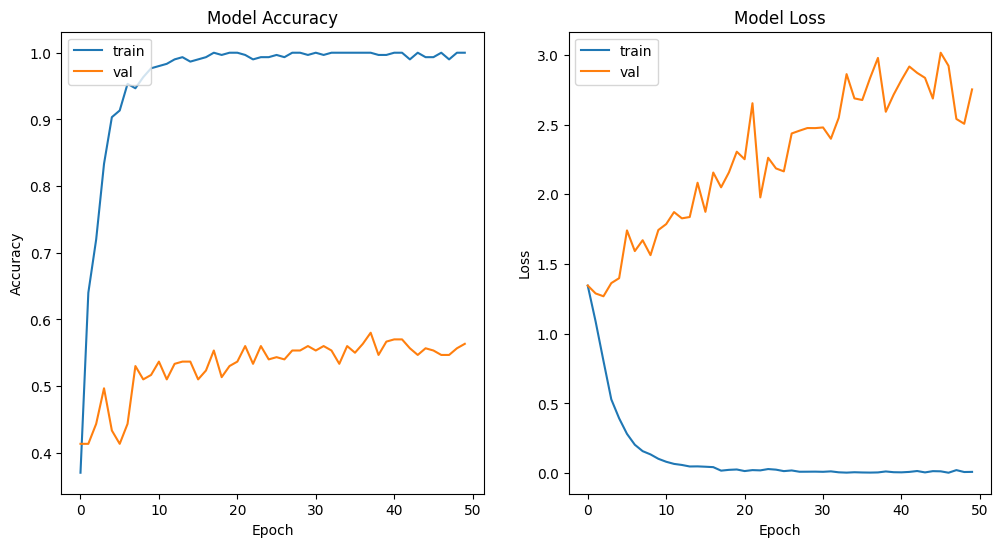

In [ ]:
#Avaliando o modelo
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper left")
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper left")

plt.show()

#Teste e matriz de confusão

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.5027 - loss: 2.3123


[2.3062691688537598, 0.5199999809265137]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[51  9 10  5]
 [ 9 35 30  1]
 [22 12 37  4]
 [ 4 21 17 33]]
['led_verm_1', 'led_verm_2', 'led_verm_3', 'vazio']


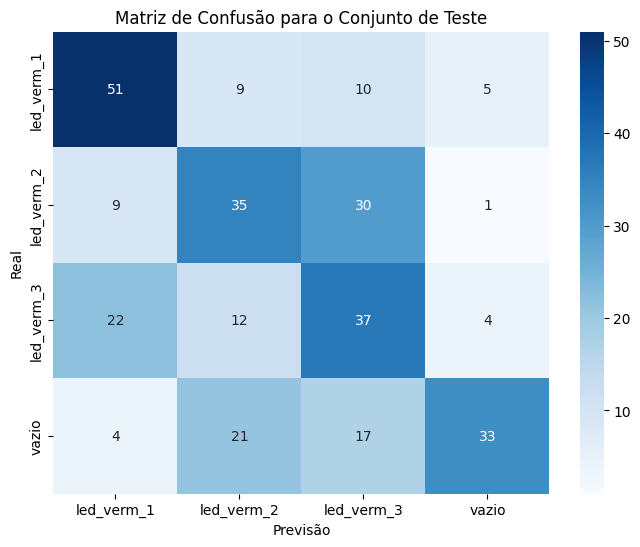

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtenha as previsões do modelo para o conjunto de teste
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_labels)
    y_true.extend(labels.numpy())

# Calcule a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Obtenha os nomes das classes do dataset
class_names = test_ds.class_names
print(cm)
print(class_names)
# Visualize a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão para o Conjunto de Teste')
plt.show()


#Conversão para TFLite

In [ ]:
model.export(f'/content/drive/MyDrive/Colab Notebooks/U3TinyML/saved_model/model')                                       # Salva o modelo no formato de pasta

Saved artifact at '/content/drive/MyDrive/Colab Notebooks/U3TinyML/saved_model/model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132922943162896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943163664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943166736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943167504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943168272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943169808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943166928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922943171344: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
MODEL_DIR = f'/content/drive/MyDrive/Colab Notebooks/U3TinyML/saved_model/model'                                   # Diretório do modelo
# Carrega o modelo salvo
#loaded = tf.saved_model.load(MODEL_DIR)                                        # carrega de uma pasta
loaded = tf.keras.models.load_model(f'/content/drive/MyDrive/Colab Notebooks/U3TinyML/saved_model/model.keras')          # carrega de um arquiv

In [ ]:
# conversão do modelo sem otimização
## converte um modelo a partir do modelo original sem salvar ou carregado de um arquivo
converter1 = tf.lite.TFLiteConverter.from_keras_model(loaded)                   # Cria o conversor para um modelo

## converte um modelo a partir do modelo original salvado em pasta
#converter1 = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
converted1 = converter1.convert()                                               # Converte o modelo

## conversão com otimização full int8
# função para gerar um conjunto representativo para a quantização
def representative_data_gen():
    for input_value, _ in train_ds.take(100):                                   # Tira uma amostra do conjunto de treinamento como dado representativo
        image = input_value[0].numpy().astype(np.float32)                       # Pega uma imagem do conjunto de treinamento
        image = np.expand_dims(image, axis=0)                                   # Adiciona uma dimensão extra para o modelo (pois o formato durante o treinamento sempre tem 1)
        #yield {input_tensor_name: image}  # nome extraído dinamicamente        # dimensão a mais (para o uso do batch)
        yield [image]                                                           # retorna apenas esse valor, se tornando um gerador de imagens

converter2 = tf.lite.TFLiteConverter.from_keras_model(loaded)
#converter2 = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
converter2.optimizations = [tf.lite.Optimize.DEFAULT]                           # otimização padrão (aplica int8 nos pesos e nas funções de ativação, se for possível)
converter2.representative_dataset = representative_data_gen                     # com a representação, é possível aplicar a quantização as funções de ativação
converter2.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]    # fala para utilização operações que suportem quantização
converter2.inference_input_type = tf.uint8                                      # converte o tipo de entrada para inteiro
converter2.inference_output_type = tf.uint8                                     # converte a saída para inteiro
converted2 = converter2.convert()                                               # Converte o modelo

Saved artifact at '/tmp/tmp877zf1_k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132922850997264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922850996304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922850998416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132922850994768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132920648686992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132920648686032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132920648687568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132920648684688: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpwjc53jzg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 240, 240

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
# Essa parte é igual ao arquivo do XOR

# Salvando o modelo sem quantização
open("RISQModel.tflite", "wb").write(converted1)

basic_model_size = os.path.getsize("RISQModel.tflite")
print("Model is %d bytes" % basic_model_size)

!echo "extern unsigned char modelSQ[];"    > /content/modelSQ.h
!echo "unsigned char modelSQ[] = {"        > /content/modelSQ.cc
!cat RISQModel.tflite | xxd -i             >> /content/modelSQ.cc
!echo "};"                                 >> /content/modelSQ.cc
!echo -n "unsigned int modelSQ_len = "     >> /content/modelSQ.cc
!echo -n "$basic_model_size"               >> /content/modelSQ.cc
!echo ";"                                  >> /content/modelSQ.cc

model_cc_size = os.path.getsize("/content/modelSQ.cc")
print(f"cc file, modelSQ.cc, is {model_cc_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h and modelSQ.cc to download the files.")

# Salvando o modelo quantizado
open("RIQModel.tflite", "wb").write(converted2)

basic_model_size = os.path.getsize("RIQModel.tflite")
#print("Model is %d bytes" % basic_model_size)

!echo "extern unsigned char modelQ[];"    > /content/modelQ.h
!echo "unsigned char modelQ[] = {"        > /content/modelQ.cc
!cat RIQModel.tflite | xxd -i             >> /content/modelQ.cc
!echo "};"                                >> /content/modelQ.cc
!echo -n "unsigned int modelQ_len = "     >> /content/modelQ.cc
!echo -n "$basic_model_size"              >> /content/modelQ.cc
!echo ";"                                 >> /content/modelQ.cc

model_cc_size = os.path.getsize("/content/modelQ.cc")
print(f"cc file, modelQ.cc, is {model_cc_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h and modelQ.cc to download the files.")

Model is 945952 bytes
cc file, modelSQ.cc, is 5,833,437 bytes.

Open the side panel (refresh if needed). Double click model.h and modelSQ.cc to download the files.
cc file, modelQ.cc, is 1,493,285 bytes.

Open the side panel (refresh if needed). Double click model.h and modelQ.cc to download the files.


#Teste com ESP-CAM

In [ ]:
#como testar o modelo

interpreter1 = tf.lite.Interpreter(model_content=converted1)
interpreter1.allocate_tensors()
print(interpreter1.get_input_details());
print(interpreter1.get_output_details());
print(interpreter1.get_input_details()[0]['name'])

input1 = interpreter1.get_input_details()[0]      # dicionário tem apenas 1 elemento
output1 = interpreter1.get_output_details()[0]    # dicionário tem apenas 1 elemento


# Pegando uma imagem
for images, labels in test_ds.take(1):
   image = images[20].numpy()
   label = labels[20].numpy()

# Ajustando shape e tipo
input_data = np.expand_dims(image, axis=0).astype(np.float32)

interpreter1.set_tensor(input1['index'], input_data)
interpreter1.invoke()
output = np.array(interpreter1.get_tensor(output1['index']))
print(f'saida modelo convertido (original): {output}')
print(f'label: {label}')

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([  1, 240, 240,   3], dtype=int32), 'shape_signature': array([ -1, 240, 240,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall_1:0', 'index': 17, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([-1,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
serving_default_input_layer:0
saida modelo convertido (original): [[9.8035723e-01 3.0300603e-04 1.9333037e-02 6.6789376e-06]]
label: 0
